In [1]:
#!pip install git+https://github.com/pydata/pandas-datareader.git
# conda install matplotlib
#!pip install tensorflow
#!pip install keras
#!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from datetime import date
# import pandas_datareader as data
import yfinance as yf
import requests
from bs4 import BeautifulSoup

In [3]:
start = input("Start Date(yyyy-mm-dd): ")
end = input("End Date of today?[y/n] ")
if(end == 'y'):
    end = date.today().strftime('%Y-%m-%d')
else:
    end = input("End Date ")
ticker = input("Stock ticker: ")
stock = yf.Ticker(ticker)

Start Date(yyyy-mm-dd): 2010-01-01
End Date of today?[y/n] y
Stock ticker: AAPL


In [4]:
df = stock.history(start=start, end=end, interval="1d")
df.reset_index(inplace=True)

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00-05:00,6.508334,6.540962,6.476315,6.526020,493729600,0.0,0.0
1,2010-01-05 00:00:00-05:00,6.544013,6.574202,6.502846,6.537304,601904800,0.0,0.0
2,2010-01-06 00:00:00-05:00,6.537302,6.563222,6.426609,6.433318,552160000,0.0,0.0
3,2010-01-07 00:00:00-05:00,6.457105,6.464729,6.374771,6.421427,477131200,0.0,0.0
4,2010-01-08 00:00:00-05:00,6.412887,6.464727,6.375075,6.464117,447610800,0.0,0.0


In [6]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3227,2022-10-27 00:00:00-04:00,148.070007,149.050003,144.130005,144.800003,109180200,0.0,0.0
3228,2022-10-28 00:00:00-04:00,148.199997,157.500000,147.820007,155.740005,164762400,0.0,0.0
3229,2022-10-31 00:00:00-04:00,153.160004,154.240005,151.919998,153.339996,97943200,0.0,0.0
3230,2022-11-01 00:00:00-04:00,155.080002,155.449997,149.130005,150.649994,80379300,0.0,0.0
3231,2022-11-02 00:00:00-04:00,148.945007,152.169998,145.500000,146.240005,71224560,0.0,0.0


In [7]:
df = df.reset_index()


In [8]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-01-04 00:00:00-05:00,6.508334,6.540962,6.476315,6.526020,493729600,0.0,0.0
1,1,2010-01-05 00:00:00-05:00,6.544013,6.574202,6.502846,6.537304,601904800,0.0,0.0
2,2,2010-01-06 00:00:00-05:00,6.537302,6.563222,6.426609,6.433318,552160000,0.0,0.0
3,3,2010-01-07 00:00:00-05:00,6.457105,6.464729,6.374771,6.421427,477131200,0.0,0.0
4,4,2010-01-08 00:00:00-05:00,6.412887,6.464727,6.375075,6.464117,447610800,0.0,0.0


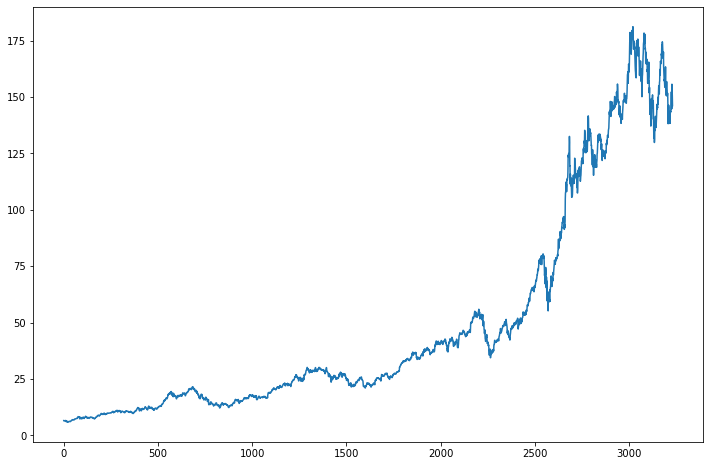

In [9]:
#basic plot of the closing price of the stock
plt.figure(figsize=(12,8))
plt.plot(df.Close)

In [10]:
df.Close.rolling(100)

Rolling [window=100,center=False,axis=0,method=single]

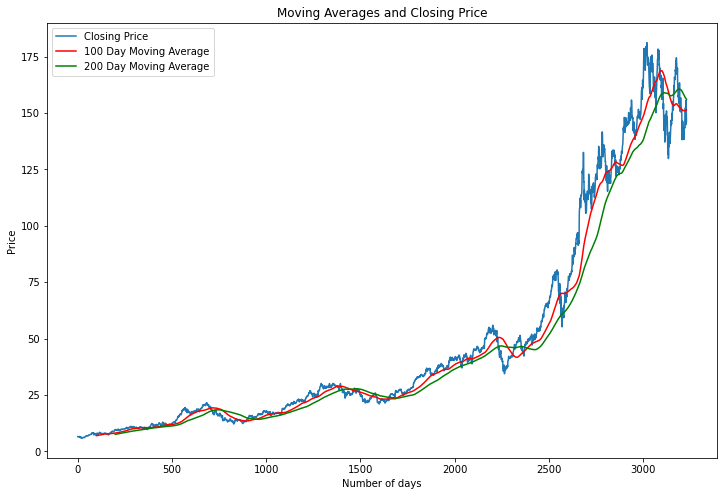

In [11]:
#simultaneously plotting the 100 day moving average and 200 day movign average on the same plot
plt.figure(figsize=(12,8))
plt.plot(df.Close)
mov_avg100 = df.Close.rolling(100).mean()
plt.plot(mov_avg100, 'r')
mov_avg200 = df.Close.rolling(200).mean()
plt.plot(mov_avg200, 'g')
plt.legend(["Closing Price", "100 Day Moving Average", "200 Day Moving Average"])
plt.title("Moving Averages and Closing Price")
plt.xlabel("Number of days")
plt.ylabel("Price")
plt.show()

In [12]:
#splitting the dataset into train and test data
df_train = pd.DataFrame(df["Close"].loc[0:df.shape[0]*0.7])
df_test = pd.DataFrame(df["Close"].loc[df.shape[0]*0.7:])

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_train_scaled = scaler.fit_transform(df_train)


In [14]:
#predicting the stock price of the upcoming day based on the prices in the last 100 days
X_train = []   #prices of past 100 days
Y_train = []   #price to be predicted
for i in range(100,df_train.shape[0]-1):
    X_train.append(df_train_scaled[i-100:i])
    Y_train.append(df_train_scaled[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)

In [15]:
#Machine Learning Model for prediction
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()
#adding layers to the model

#layer 1
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape = (X_train.shape[1],1), name="layer_1"))
model.add(Dropout(0.2))

#layer 2
model.add(LSTM(units=60, activation="relu", return_sequences=True, name="layer_2"))
model.add(Dropout(0.3))

#layer 3
model.add(LSTM(units=80, activation="relu", return_sequences=True, name="layer_3"))
model.add(Dropout(0.4))

#layer 4
model.add(LSTM(units=120, activation="relu", name="layer_4"))
model.add(Dropout(0.5))

#output layer
model.add(Dense(units=1, name="layer_5"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 layer_2 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 layer_3 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 layer_4 (LSTM)              (None, 120)               9

In [18]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train,Y_train, epochs=50)


Epoch 1/50
68/68 [==============================] - 18s 170ms/step - loss: 0.0302
Epoch 2/50
68/68 [==============================] - 10s 151ms/step - loss: 0.0061
Epoch 3/50
68/68 [==============================] - 13s 187ms/step - loss: 0.0061
Epoch 4/50
68/68 [==============================] - 12s 178ms/step - loss: 0.0047
Epoch 5/50
68/68 [==============================] - 12s 183ms/step - loss: 0.0043
Epoch 6/50
68/68 [==============================] - 12s 184ms/step - loss: 0.0040
Epoch 7/50
68/68 [==============================] - 12s 175ms/step - loss: 0.0043
Epoch 8/50
68/68 [==============================] - 12s 177ms/step - loss: 0.0039
Epoch 9/50
68/68 [==============================] - 12s 172ms/step - loss: 0.0035
Epoch 10/50
68/68 [==============================] - 12s 178ms/step - loss: 0.0031
Epoch 11/50
68/68 [==============================] - 12s 170ms/step - loss: 0.0036
Epoch 12/50
68/68 [==============================] - 13s 186ms/step - loss: 0.0032
Epoch 13/50
6

In [19]:
#to make predictions of the testing data we need data of the past 100 days from the training data
#thus we append

past_100_days = df_train.tail(100)
df_test_final = past_100_days.append(df_test, ignore_index=True)

#dataset has been formed, now all the same processes are repeated as were done for training data
df_test_scaled = scaler.fit_transform(df_test_final)


X_test = []   #prices of past 100 days
Y_test = []   #price to be predicted
for i in range(100,df_test.shape[0]-1):
    X_test.append(df_test_scaled[i-100:i])
    Y_test.append(df_test_scaled[i])

X_test, Y_test = np.array(X_test), np.array(Y_test)

C:\Users\devan\AppData\Local\Temp\ipykernel_16180\2581507372.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_final = past_100_days.append(df_test, ignore_index=True)


In [20]:
y_predicted = model.predict(X_test)

28/28 [==============================] - 2s 41ms/step


In [21]:
# X_test.shape
X_test
Y_test.shape
X_train
# df_test_final.shape

array([[[0.01338261],
        [0.01360812],
        [0.01152999],
        ...,
        [0.03334076],
        [0.03240228],
        [0.03172586]],

       [[0.01360812],
        [0.01152999],
        [0.01129236],
        ...,
        [0.03240228],
        [0.03172586],
        [0.0373568 ]],

       [[0.01152999],
        [0.01129236],
        [0.0121455 ],
        ...,
        [0.03172586],
        [0.0373568 ],
        [0.03950802]],

       ...,

       [[0.84946596],
        [0.87771755],
        [0.88059551],
        ...,
        [0.66008691],
        [0.64047649],
        [0.6110126 ]],

       [[0.87771755],
        [0.88059551],
        [0.88577568],
        ...,
        [0.64047649],
        [0.6110126 ],
        [0.59217467]],

       [[0.88059551],
        [0.88577568],
        [0.87637452],
        ...,
        [0.6110126 ],
        [0.59217467],
        [0.6421189 ]]])

In [22]:
df_train.tail()

,Close
2258,36.430573
2259,35.487949
2260,37.987087
2261,37.740551
2262,37.759888


In [23]:
scaler.scale_
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
Y_test = Y_test * scale_factor

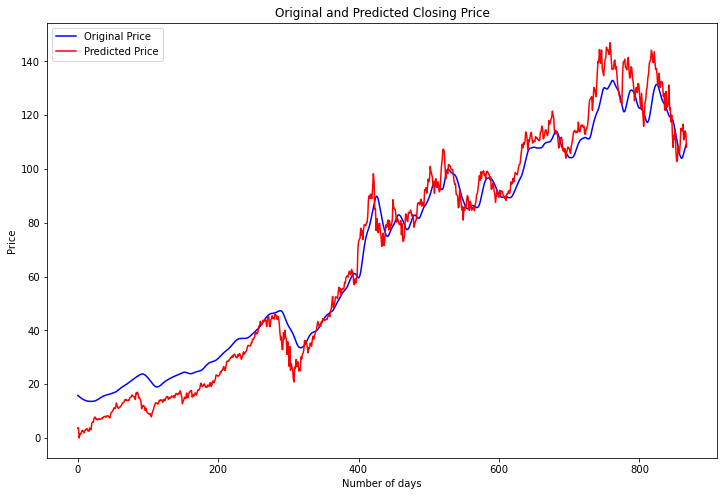

In [24]:
plt.figure(figsize = (12,8))
plt.plot(y_predicted, 'b')
plt.plot(Y_test, 'r')
plt.legend(["Original Price","Predicted Price"])
plt.title("Original and Predicted Closing Price")
plt.xlabel("Number of days")
plt.ylabel("Price")
plt.show()

In [25]:
model.save("keras_model.h5")